In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
BAYC = pd.read_csv("BAYC_3.csv", low_memory=False)

C:\Users\tom36\AppData\Local\Temp\ipykernel_13644\3806588248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BAYC_dates['Date'] = pd.to_datetime(BAYC_dates['timestamp'], format='%d/%m/%Y %H:%M')
C:\Users\tom36\AppData\Local\Temp\ipykernel_13644\3806588248.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BAYC_dates['Date'] = BAYC_dates['Date'].dt.strftime('%d/%m/%Y')


<Axes: title={'center': 'Number of daily transactions over time (BAYC)'}, xlabel='Date', ylabel='transactions'>

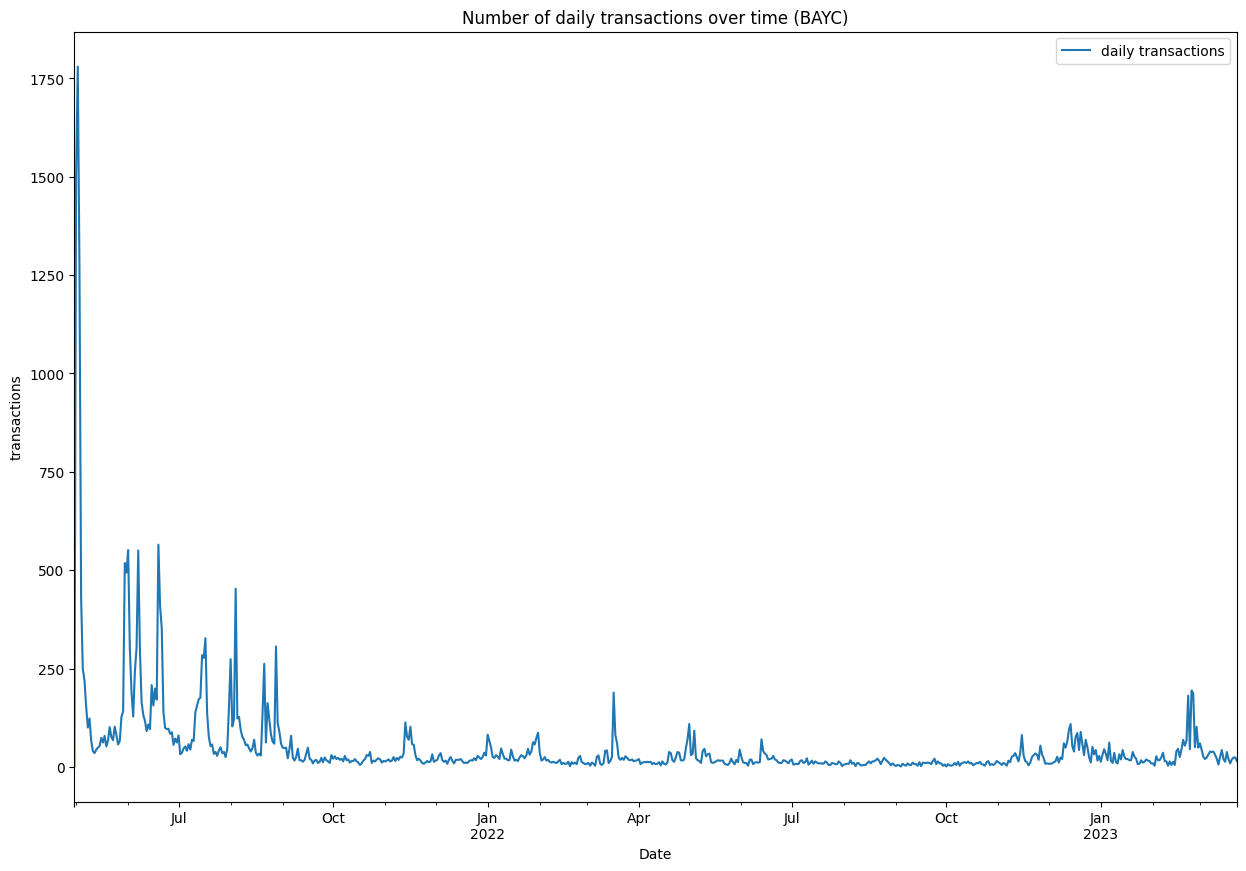

In [15]:
BAYC_dates = BAYC[["timestamp"]]
BAYC_dates['Date'] = pd.to_datetime(BAYC_dates['timestamp'], format='%d/%m/%Y %H:%M')
BAYC_dates['Date'] = BAYC_dates['Date'].dt.strftime('%d/%m/%Y')
BAYC_dates = BAYC_dates[['Date']]
BAYC_2 = pd.concat([BAYC_dates, BAYC[["usd_price"]]], axis=1)
BAYC_2.index = BAYC_2["Date"]
BAYC_2.index = pd.to_datetime(BAYC_2.index, format="%d/%m/%Y")
BAYC_daily_transaction = BAYC_2.resample('d').count()
BAYC_daily_transaction = BAYC_daily_transaction['usd_price'].to_frame()
BAYC_daily_transaction = BAYC_daily_transaction.rename(columns={'usd_price': "daily transactions"})
BAYC_daily_transaction.plot(title="Number of daily transactions over time (BAYC)", figsize=(15,10), color="C0", 
ylabel="transactions")

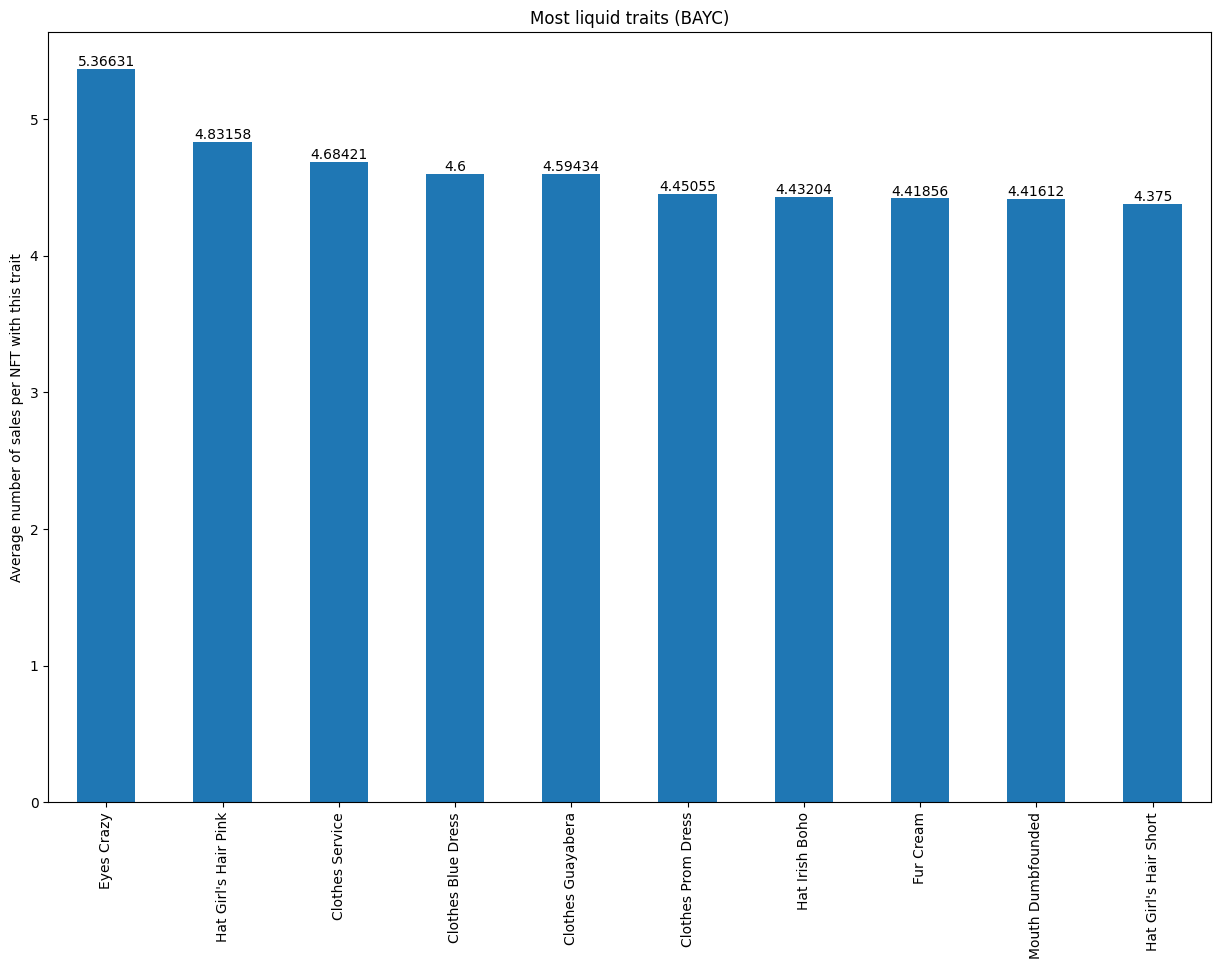

In [16]:
BAYC = pd.read_csv("BAYC_3.csv", low_memory=False)

BAYC_Background = BAYC[['Background']]
BAYC_Clothes = BAYC[['Clothes']]
BAYC_Earring = BAYC[['Earring']]
BAYC_Eyes = BAYC[['Eyes']]
BAYC_Fur = BAYC[['Fur']]
BAYC_Hat = BAYC[['Hat']]
BAYC_Mouth = BAYC[['Mouth']]

BAYC_Background_count = BAYC_Background['Background'].value_counts()
BAYC_Clothes_count = BAYC_Clothes['Clothes'].value_counts()
BAYC_Earring_count = BAYC_Earring['Earring'].value_counts()
BAYC_Eyes_count = BAYC_Eyes['Eyes'].value_counts()
BAYC_Fur_count = BAYC_Fur['Fur'].value_counts()
BAYC_Hat_count = BAYC_Hat['Hat'].value_counts()
BAYC_Mouth_count = BAYC_Mouth['Mouth'].value_counts()

BAYC_Background_count.index = 'Background ' + BAYC_Background_count.index 
BAYC_Clothes_count.index = 'Clothes ' + BAYC_Clothes_count.index
BAYC_Earring_count.index = 'Earring ' + BAYC_Earring_count.index
BAYC_Eyes_count.index = 'Eyes ' + BAYC_Eyes_count.index
BAYC_Fur_count.index = 'Fur ' + BAYC_Fur_count.index
BAYC_Hat_count.index = 'Hat ' + BAYC_Hat_count.index
BAYC_Mouth_count.index = 'Mouth ' + BAYC_Mouth_count.index

BAYC_count = pd.concat([BAYC_Background_count, BAYC_Clothes_count, BAYC_Earring_count, BAYC_Eyes_count, 
BAYC_Fur_count, BAYC_Hat_count, BAYC_Mouth_count], axis=0).to_frame()

BAYC_unique = BAYC.drop_duplicates(subset='token_id', keep='first')

BAYC_unique_Background_count = BAYC_unique['Background'].value_counts()
BAYC_unique_Clothes_count = BAYC_unique['Clothes'].value_counts()
BAYC_unique_Earring_count = BAYC_unique['Earring'].value_counts()
BAYC_unique_Eyes_count = BAYC_unique['Eyes'].value_counts()
BAYC_unique_Fur_count = BAYC_unique['Fur'].value_counts()
BAYC_unique_Hat_count = BAYC_unique['Hat'].value_counts()
BAYC_unique_Mouth_count = BAYC_unique['Mouth'].value_counts()

BAYC_unique_Background_count.index = 'Background ' + BAYC_unique_Background_count.index 
BAYC_unique_Clothes_count.index = 'Clothes ' + BAYC_unique_Clothes_count.index
BAYC_unique_Earring_count.index = 'Earring ' + BAYC_unique_Earring_count.index
BAYC_unique_Eyes_count.index = 'Eyes ' + BAYC_unique_Eyes_count.index
BAYC_unique_Fur_count.index = 'Fur ' + BAYC_unique_Fur_count.index
BAYC_unique_Hat_count.index = 'Hat ' + BAYC_unique_Hat_count.index
BAYC_unique_Mouth_count.index = 'Mouth ' + BAYC_unique_Mouth_count.index

BAYC_unique_count = pd.concat([BAYC_unique_Background_count, BAYC_unique_Clothes_count, BAYC_unique_Earring_count, 
BAYC_unique_Eyes_count, BAYC_unique_Fur_count, BAYC_unique_Hat_count, BAYC_unique_Mouth_count], axis=0).to_frame()

BAYC_liquid_traits = BAYC_count[0].sort_index() / BAYC_unique_count[0].sort_index()
BAYC_liquid_traits = BAYC_liquid_traits.sort_values(ascending=False)

ax = BAYC_liquid_traits[:10].plot(kind='bar', title='Most liquid traits (BAYC)', figsize=(15,10), 
ylabel="Average number of sales per NFT with this trait", color='C0')

for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [17]:
BAYC[['usd_price', "eth_price", 'royalty_fee', 'platform_fee']].describe()

,usd_price,eth_price,royalty_fee,platform_fee
count,3.348300e+04,3.348300e+04,33483.000000,33483.000000
mean,8.364069e+04,3.500279e+01,3.074627,2.913018
std,1.220463e+05,4.675690e+01,95.648891,94.192348
min,6.611481e-07,2.054697e-10,0.000000,0.000000
25%,3.293835e+03,1.200000e+00,0.013500,0.009975
50%,1.835633e+04,8.100000e+00,0.100000,0.066250
75%,1.242166e+05,6.676000e+01,0.962541,0.925000
max,2.922371e+06,1.080690e+03,6687.500000,6687.500000


C:\Users\tom36\AppData\Local\Temp\ipykernel_13644\459249570.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BAYC_dates['Date'] = pd.to_datetime(BAYC_dates['timestamp'], format='%d/%m/%Y %H:%M')
C:\Users\tom36\AppData\Local\Temp\ipykernel_13644\459249570.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BAYC_dates['Date'] = BAYC_dates['Date'].dt.strftime('%d/%m/%Y')
C:\Users\tom36\AppData\Local\Temp\ipykernel_13644\459249570.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.me

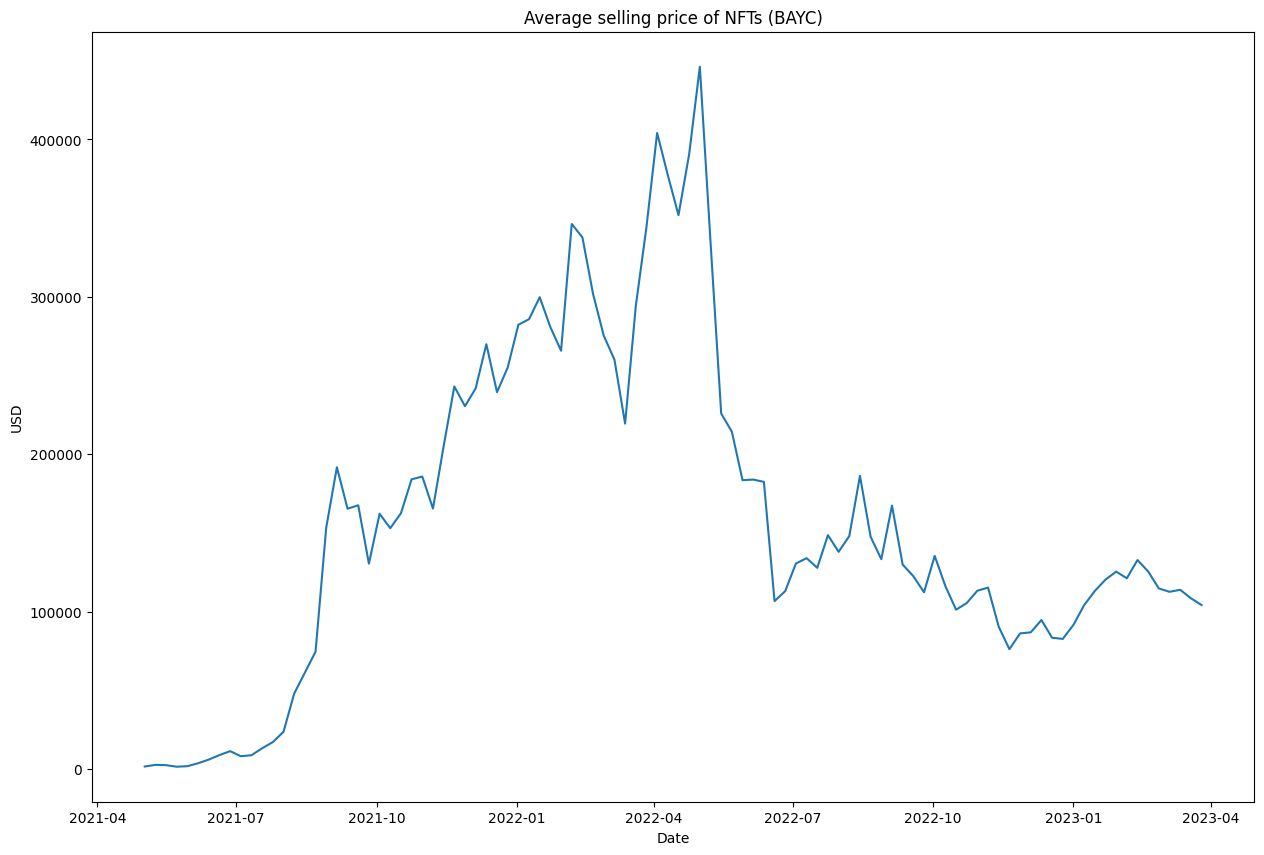

In [18]:
BAYC = pd.read_csv("BAYC_3.csv", low_memory=False)

BAYC_dates = BAYC[["timestamp"]]
BAYC_dates['Date'] = pd.to_datetime(BAYC_dates['timestamp'], format='%d/%m/%Y %H:%M')
BAYC_dates['Date'] = BAYC_dates['Date'].dt.strftime('%d/%m/%Y')
BAYC_dates = BAYC_dates[['Date']]
BAYC_2 = pd.concat([BAYC_dates, BAYC[["usd_price"]]], axis=1)
BAYC_2.index = BAYC_2["Date"]
BAYC_2.index = pd.to_datetime(BAYC_2.index, format="%d/%m/%Y")

BAYC_3 = BAYC_2.resample('w').mean()

fig, ax1 = plt.subplots(figsize=(15,10))
ax1.plot(BAYC_3.index, BAYC_3['usd_price'], color="C0")
ax1.set_title("Average selling price of NFTs (BAYC)")
ax1.set_ylabel("USD")
ax1.set_xlabel("Date")
plt.show()

C:\Users\tom36\AppData\Local\Temp\ipykernel_13644\3452907849.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BAYC_dates['Date'] = pd.to_datetime(BAYC_dates['timestamp'], format='%d/%m/%Y %H:%M')
C:\Users\tom36\AppData\Local\Temp\ipykernel_13644\3452907849.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BAYC_dates['Date'] = BAYC_dates['Date'].dt.strftime('%d/%m/%Y')
C:\Users\tom36\AppData\Local\Temp\ipykernel_13644\3452907849.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy

Text(0.5, 1.0, 'Correlation between average BAYC NFT price, ETH price and volume on Opensea')

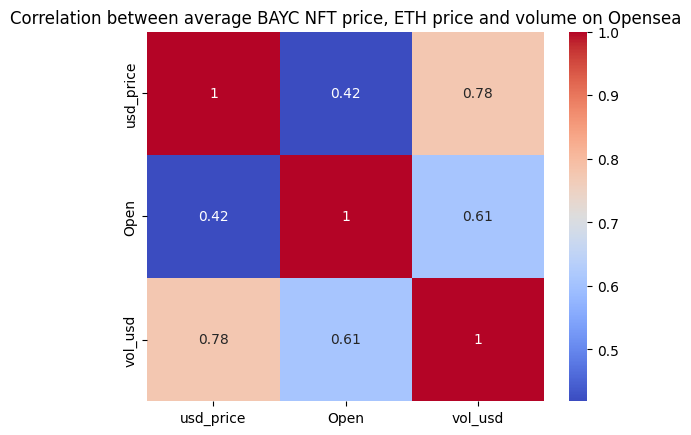

In [19]:
BAYC = pd.read_csv("BAYC_3.csv", low_memory=False)

BAYC_dates = BAYC[["timestamp"]]
BAYC_dates['Date'] = pd.to_datetime(BAYC_dates['timestamp'], format='%d/%m/%Y %H:%M')
BAYC_dates['Date'] = BAYC_dates['Date'].dt.strftime('%d/%m/%Y')
BAYC_dates = BAYC_dates[['Date']]
BAYC_2 = pd.concat([BAYC_dates, BAYC[["usd_price"]]], axis=1)
BAYC_2.index = BAYC_2["Date"]
BAYC_2.index = pd.to_datetime(BAYC_2.index, format="%d/%m/%Y")

eth = pd.read_csv("ETH-USD.csv")   
eth = eth[['Date', 'Open']]
eth['Date'] = pd.to_datetime(eth['Date'], format='%Y-%m-%d')
eth['Date'] = eth['Date'].dt.strftime('%d/%m/%Y')
eth.index = eth["Date"]
eth.index = pd.to_datetime(eth.index, format="%d/%m/%Y")

volume = pd.read_csv('opensea_volume.csv')      
volume['time'] = pd.to_datetime(volume['time'], format='%Y-%m-%d %H:%M:%S.%f UTC')
volume['time'] = volume['time'].dt.strftime('%d/%m/%Y')
volume.index = volume["time"]
volume.index = pd.to_datetime(volume.index, format="%d/%m/%Y")
volume.index.name = "Date"

BAYC_2 = BAYC_2.resample('w').mean()
eth_3 = eth.resample('w').mean()
volume_3 = volume.resample('w').mean()


BAYC_eth = pd.merge(BAYC_2, eth_3, on='Date', how='left')
BAYC_eth_2 = pd.merge(BAYC_eth, volume_3, on='Date', how='left')
BAYC_eth_2 = BAYC_eth_2[['usd_price', 'Open', 'vol_usd']]

corr_matrix = BAYC_eth_2.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between average BAYC NFT price, ETH price and volume on Opensea')

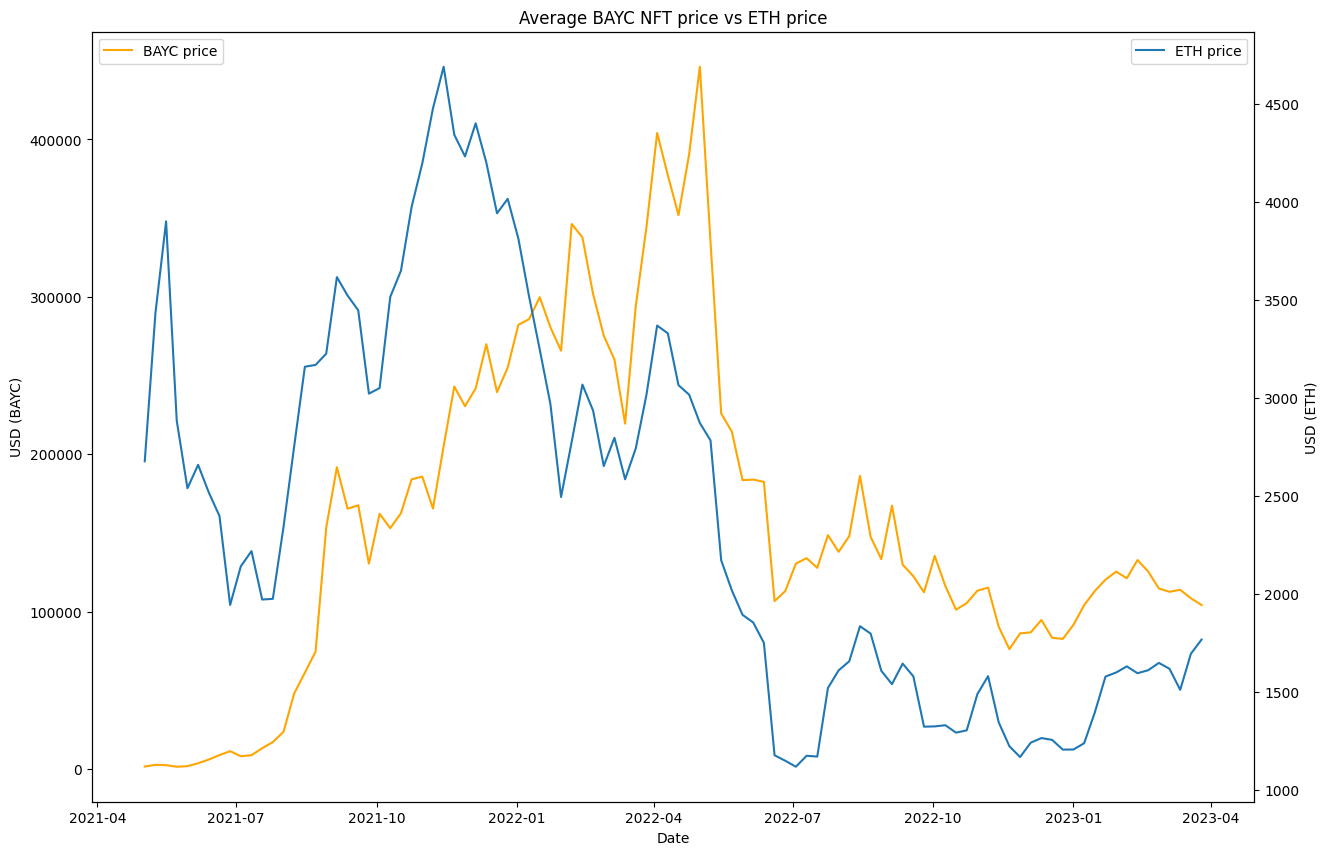

In [20]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()

ax1.plot(BAYC_eth_2.index, BAYC_eth_2['usd_price'], label="BAYC price", color="orange")
ax2.plot(BAYC_eth_2.index, BAYC_eth_2['Open'], label='ETH price')

ax1.set_title('Average BAYC NFT price vs ETH price')
ax1.set_ylabel('USD (BAYC)')
ax1.set_xlabel('Date')
ax2.set_ylabel('USD (ETH)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

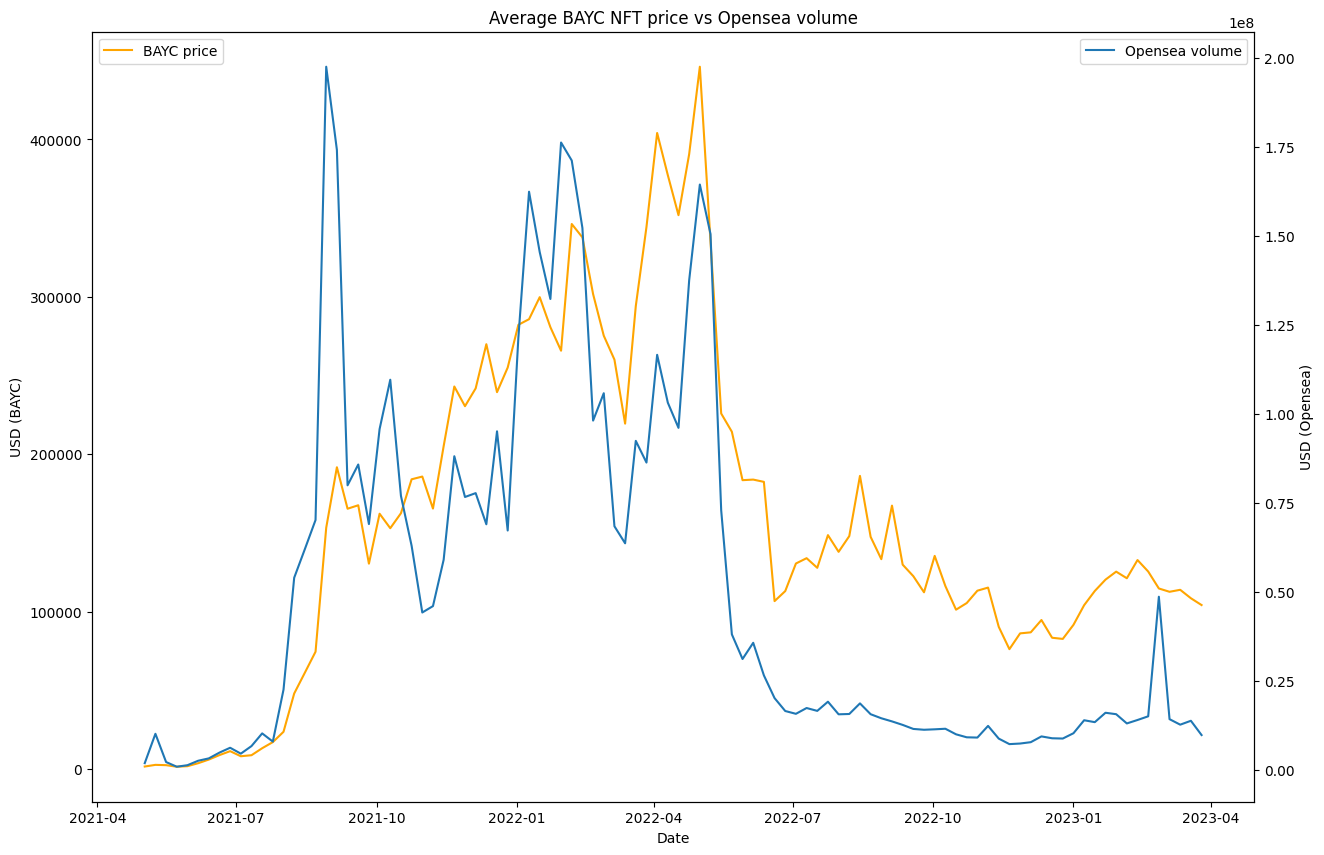

In [21]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()

ax1.plot(BAYC_eth_2.index, BAYC_eth_2['usd_price'], label="BAYC price", color="orange")
ax2.plot(BAYC_eth_2.index, BAYC_eth_2['vol_usd'], label='Opensea volume')

ax1.set_title('Average BAYC NFT price vs Opensea volume')
ax1.set_ylabel('USD (BAYC)')
ax1.set_xlabel('Date')
ax2.set_ylabel('USD (Opensea)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()